## Performing gradient descent in regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#preparing dataset
data = np.random.randn(500, 2)
print(data[0])
print(data[0,0])
print(data[0,1])

[0.43700665 1.72233956]
0.43700665365332786
1.7223395590290689


In [3]:
theta = np.zeros(2)
theta

array([0., 0.])

In [4]:
#defining loss function

def loss_function(data,theta):
  m = theta[0]
  b = theta[1]
  loss = 0
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    y_hat = (m*x + b)
    loss = loss + ((y - (y_hat)) ** 2)
  mse = loss / float(len(data))
  return mse



In [5]:
loss = loss_function(data,theta)
loss

0.9862311778931446

In [6]:
# computing the gradient of the loss function
def compute_gradients(data, theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b = theta[1]
  for i in range(0, len(data)):
    x = data[i, 0]
    y = data[i, 1]
    gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
    gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
  epsilon = 1e-6
  gradients = np.divide(gradients, N + epsilon)
  return gradients

In [7]:
gradients=compute_gradients(data,theta)
gradients

array([-2.29373024e-04, -7.16237437e-05])

Text(0.5, 1.0, 'Gradient Descent')

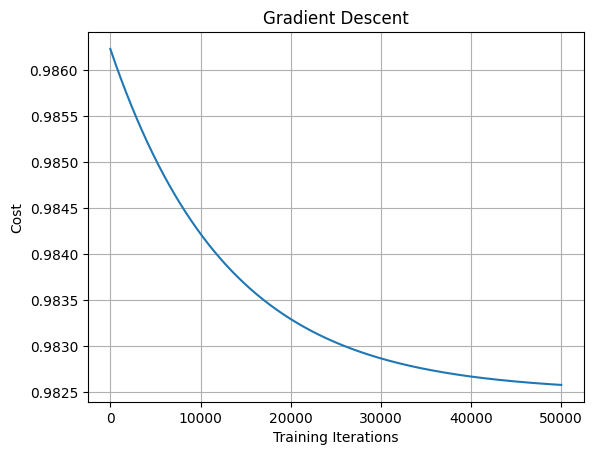

In [8]:
num_iterations = 50000
lr = 1e-2
loss = []
theta = np.zeros(2)
for t in range(num_iterations):
  #compute gradients
  gradients = compute_gradients(data, theta)
  #update parameter
  theta = theta - (lr*gradients)
  #store the loss
  loss.append(loss_function(data,theta))
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

# Gradient descent versus stochastic gradient descent

In [9]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
data = np.random.randn(500, 2)
theta = np.zeros(2)

In [11]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 1000):
  minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
  for t in range(num_iterations):
    sample_size = random.sample(range(len(data)), minibatch_size)
    np.random.shuffle(data)
    sample_data = data[0:sample_size[0], :]
    grad = compute_gradients(sample_data, theta)
    theta = theta - (lr * grad)
  return theta

In [12]:
minibatch(data,theta)

array([-0.01371941,  0.02874051])

## Momentum-based gradient descent


In [13]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
data = np.random.randn(500, 2)
theta = np.zeros(2)

In [15]:
## Gradient descent with momentum
def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    vt = gamma * vt + lr * gradients
    theta = theta - vt
  return theta

In [16]:
momentum(data,theta)

array([-0.0241325 , -0.00640249])

In [17]:
## Nesterov accelerated gradient
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta - gamma * vt)
    vt = gamma * vt + lr * gradients
    theta = theta - vt
  return theta


In [18]:
NAG(data,theta)

array([-0.02412533, -0.00640017])

## Adaptive methods of gradient descent

In [19]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
data = np.random.randn(500, 2)
theta = np.zeros(2)

In [21]:
## Setting a learning rate adaptively using Adagrad
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 10000):
  gradients_sum = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    gradients_sum += gradients ** 2
    gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    theta = theta - (lr * gradient_update)
  return theta

In [22]:
AdaGrad(data,theta)

array([0.01318764, 0.07444142])

In [23]:
## Doing away with the learning rate using Adadelta
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 1000):
  # running average of gradients
  E_grad2 = np.zeros(theta.shape[0])
  #running average of parameter update
  E_delta_theta2 = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    E_grad2 = gamma * E_grad2 + (1 - gamma) * gradients ** 2
    delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients
    E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta ** 2))
    theta = theta + delta_theta
  return theta

In [24]:
AdaDelta(data,theta)

array([0.01290642, 0.07309021])

In [25]:
## Overcoming the limitations of Adagrad using RMSProp
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations = 1000):
  E_grad2 = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    E_grad2 = gamma * E_grad2 + (1 - gamma) * gradients ** 2
    theta = theta - (lr / np.sqrt(E_grad2 + epsilon)) * gradients
  return theta

In [26]:
RMSProp(data,theta)

array([0.01318764, 0.07444142])

In [27]:
## Adaptive moment estimation
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
  mt = np.zeros(theta.shape[0])
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    mt = beta1 * mt + (1. - beta1) * gradients
    vt = beta2 * vt + (1. - beta2) * gradients ** 2
    mt_hat = mt / (1. - beta1 ** (t+1))
    vt_hat = vt / (1. - beta2 ** (t+1))
    theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
  return theta

In [28]:
Adam(data, theta)

array([0.01319252, 0.07445743])

In [29]:
## Adamax – Adam based on infinity-norm
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 1000):
  mt = np.zeros(theta.shape[0])
  vt = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    mt = beta1 * mt + (1. - beta1) * gradients
    vt = np.maximum(beta2 * vt, np.abs(gradients))
    mt_hat = mt / (1. - beta1 ** (t+1))
    theta = theta - ((lr / (vt + epsilon)) * mt_hat)
  return theta


In [30]:
Adamax(data,theta)

array([0.01318764, 0.07444142])

In [31]:
## Adaptive moment estimation with AMSGrad
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
  mt = np.zeros(theta.shape[0])
  vt = np.zeros(theta.shape[0])
  vt_hat = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    mt = beta1 * mt + (1. - beta1) * gradients
    vt = beta2 * vt + (1. - beta2) * gradients ** 2
    vt_hat = np.maximum(vt_hat,vt)
    mt_hat = mt / (1. - beta1 ** (t+1))
    theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
  return theta


In [32]:
AMSGrad(data, theta)

array([0.01318764, 0.07444142])

In [33]:
## Nadam – adding NAG to ADAM
def Nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):
  mt = np.zeros(theta.shape[0])
  vt = np.zeros(theta.shape[0])
  beta_prod = 1
  for t in range(num_iterations):
    gradients = compute_gradients(data, theta)
    mt = beta1 * mt + (1. - beta1) * gradients
    vt = beta2 * vt + (1. - beta2) * gradients ** 2
    beta_prod = beta_prod * (beta1)
    mt_hat = mt / (1. - beta_prod)
    g_hat = gradients / (1. - beta_prod)
    vt_hat = vt / (1. - beta2 ** (t))
    mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
    theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
  return theta

In [34]:
Nadam(data, theta)

array([0.01318764, 0.07444142])